In [1]:
import networkx as nx
import modelz
import graphs
import embedder
import classifier
import matplotlib.pyplot as plt
import psutil

In [2]:
print('Total RAM memory (ex SWAP):', psutil.virtual_memory()[0]/10**9)
print('Available RAM memory:', psutil.virtual_memory()[1]/10**9)
print('RAM memory % used:', psutil.virtual_memory()[2])

Total RAM memory (ex SWAP): 17.126875136
Available RAM memory: 11.318145024
RAM memory % used: 33.9


In [3]:
#Parameters:
beta = 0.3
gamma = 0.004
m = 0.0
delay = 10
I0 = 3
max_it = 2000
model = modelz.temporal_SIR_bis('temporal_nets_files\SFHH.dat', beta, gamma, m, delay,I0)

In [4]:
model.full_simulation()

Simulation completed, desease expired.


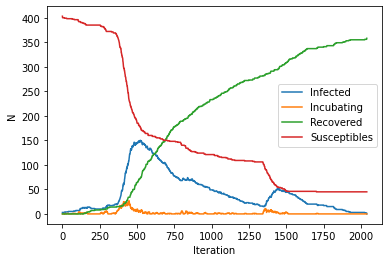

In [5]:
plt.plot(model.Inft, label = 'Infected')
plt.plot(model.Inct, label = 'Incubating')
plt.plot(model.Rect, label = 'Recovered')
plt.plot(model.Sust, label = 'Susceptibles')
plt.xlabel('Iteration')
plt.ylabel('N')
plt.legend(loc = 'best')
plt.show()

In [2]:
#Creates graph and saves .edg file:
graph = graphs.watts_strogatz(1000,7,0.1)
graphs.w2f(graph,"test.edgelist")

In [3]:
#Simulates modified SIR model on the graph

#Parameters:
beta = 0.1
gamma = 0.05
m = 0.0
delay = 5
I0 = 100
max_it = 2000

#Instantietes model and runs simulation:
test_model = modelz.SIR_bis(graph.copy(), graph.number_of_nodes(), beta, gamma, m, delay, I0)
iterations = test_model.full_simulation(max_it)

  9%|▉         | 181/2000 [00:00<00:02, 733.65it/s]


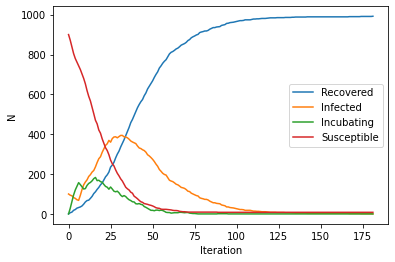

In [4]:
#Plot desease evolution over time, to get an insight on the dynamics before training the model.
plt.plot([it['node_count'][3] for it in iterations], label = 'Recovered')
plt.plot([it['node_count'][2] for it in iterations], label = 'Infected')
plt.plot([it['node_count'][1] for it in iterations], label = 'Incubating')
plt.plot([it['node_count'][0] for it in iterations], label = 'Susceptible')
plt.legend(loc = 'best')
plt.xlabel('Iteration')
plt.ylabel('N')
plt.show()

In [5]:

it_status = iterations[25]['status'] #Select a specific iteration to test
labels = [it_status[i] for i in range(graph.number_of_nodes())]

In [6]:
#Instantiates embedder objet and asks for memory requirements
n_features = 64
n_walks = 40
walk_len = 40
window_size = 5
n_iterations = 10
embedder = embedder.embedder('test.edgelist', False, False, 0.5, 1)
embedder.estimate_memory(n_features, n_walks, walk_len, window_size, n_iterations)

Memory requiered: 0.001012 Gigabytes.


In [7]:
#Gets graph embeddings
embedder.embed(n_features, n_walks, walk_len, window_size, n_iterations)
embeddings = embedder.get_embeddings()

In [11]:
#Defines classifier object and trains it
classifier1 = classifier.OneVsRest(embeddings, labels)
classifier1.train()

In [12]:
classifier1.test()

Overall accuracy: 0.46.
Recall: 0.46715328467153283.
Presicion: 0.41830065359477125.
F1 score: 0.44137931034482764.


In [8]:
classifier2 = classifier.NeuralNetwork(embeddings, labels, 64)

In [9]:
#Tests model accuracy on test set
classifier2.train(10)

Epoch 1/10
22/22 [==============================] - 0s 500us/step - loss: 1.4301 - accuracy: 0.3071
Epoch 2/10
22/22 [==============================] - 0s 477us/step - loss: 1.3224 - accuracy: 0.3871
Epoch 3/10
22/22 [==============================] - 0s 477us/step - loss: 1.2864 - accuracy: 0.4143
Epoch 4/10
22/22 [==============================] - 0s 453us/step - loss: 1.2584 - accuracy: 0.4286
Epoch 5/10
22/22 [==============================] - 0s 453us/step - loss: 1.2312 - accuracy: 0.4543
Epoch 6/10
22/22 [==============================] - 0s 477us/step - loss: 1.2099 - accuracy: 0.4629
Epoch 7/10
22/22 [==============================] - 0s 453us/step - loss: 1.1909 - accuracy: 0.4771
Epoch 8/10
22/22 [==============================] - 0s 453us/step - loss: 1.1722 - accuracy: 0.4871
Epoch 9/10
22/22 [==============================] - 0s 429us/step - loss: 1.1566 - accuracy: 0.4986
Epoch 10/10
22/22 [==============================] - 0s 477us/step - loss: 1.1434 - accuracy: 0.5186

In [13]:
classifier2.test()

AttributeError: 'NeuralNetwork' object has no attribute 'metrics'